In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV 
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error


### Reading dataset

In [3]:
house = pd.read_csv('/home/hasan/DATA SET/boston_data.csv')

### Summarize the dataset

In [4]:
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [5]:
house.shape

(404, 14)

In [6]:
house.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [7]:
house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [10]:
# correlation
pd.set_option('precision', 2)
print(house.corr(method='pearson'))


         crim    zn  indus  chas   nox    rm   age   dis   rad   tax  ptratio  \
crim     1.00 -0.19   0.40 -0.06  0.41 -0.17  0.35 -0.38  0.60  0.57     0.29   
zn      -0.19  1.00  -0.53 -0.04 -0.50  0.30 -0.55  0.66 -0.31 -0.29    -0.37   
indus    0.40 -0.53   1.00  0.06  0.76 -0.35  0.63 -0.70  0.62  0.72     0.36   
chas    -0.06 -0.04   0.06  1.00  0.10  0.09  0.08 -0.10 -0.02 -0.04    -0.12   
nox      0.41 -0.50   0.76  0.10  1.00 -0.27  0.73 -0.76  0.61  0.66     0.17   
rm      -0.17  0.30  -0.35  0.09 -0.27  1.00 -0.21  0.18 -0.17 -0.24    -0.32   
age      0.35 -0.55   0.63  0.08  0.73 -0.21  1.00 -0.73  0.47  0.50     0.23   
dis     -0.38  0.66  -0.70 -0.10 -0.76  0.18 -0.73  1.00 -0.50 -0.53    -0.21   
rad      0.60 -0.31   0.62 -0.02  0.61 -0.17  0.47 -0.50  1.00  0.92     0.49   
tax      0.57 -0.29   0.72 -0.04  0.66 -0.24  0.50 -0.53  0.92  1.00     0.47   
ptratio  0.29 -0.37   0.36 -0.12  0.17 -0.32  0.23 -0.21  0.49  0.47     1.00   
black   -0.38  0.18  -0.38  

### Data Visualizations

##### Univariate plots

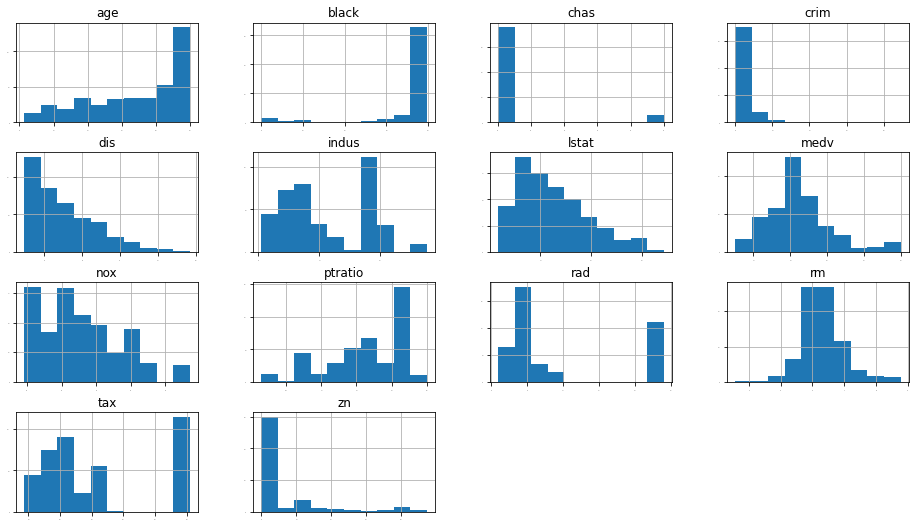

In [13]:
# histograms
house.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(16,9))
plt.show()

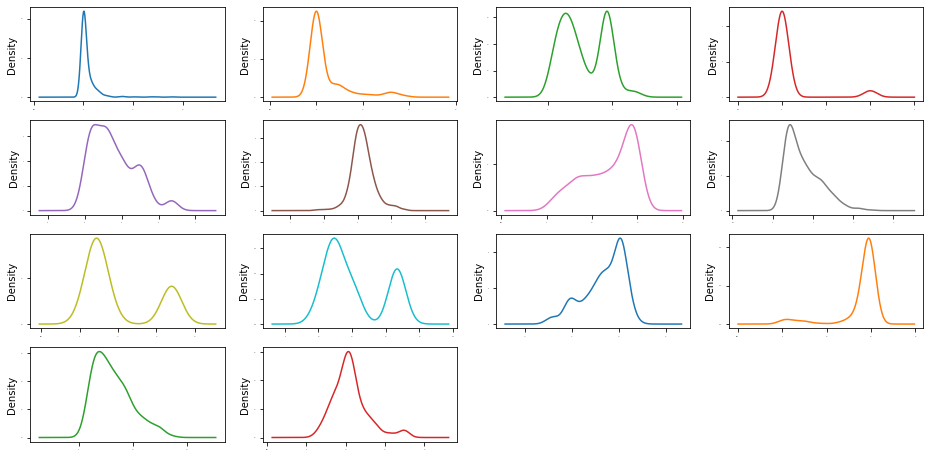

In [15]:
# density
house.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=(16,8))
plt.show()


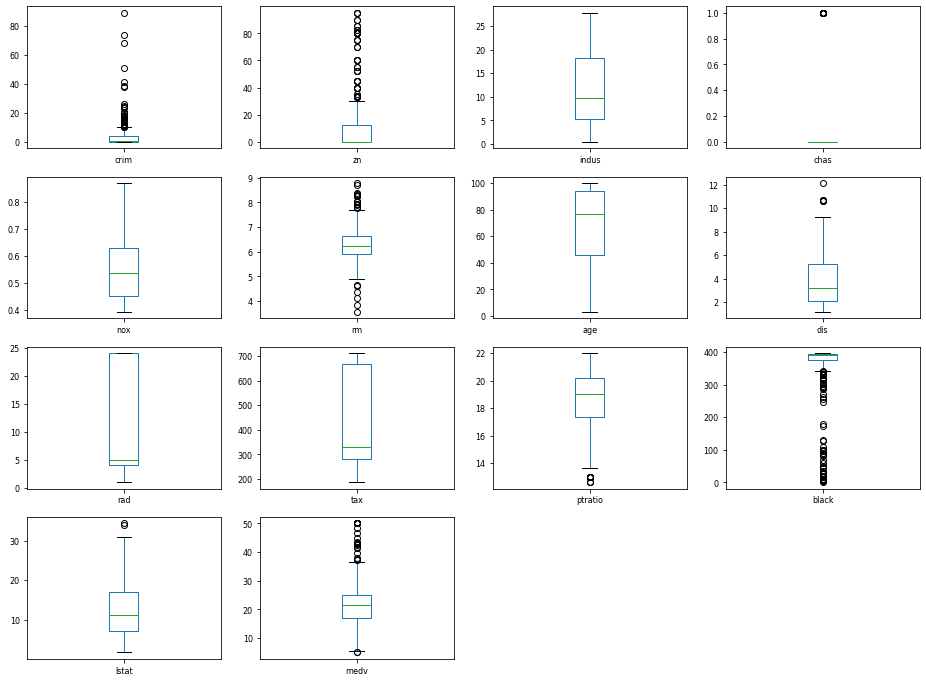

In [19]:
# box and whisker plots
house.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, figsize=(16,12))
plt.show()


##### Multivariate plot

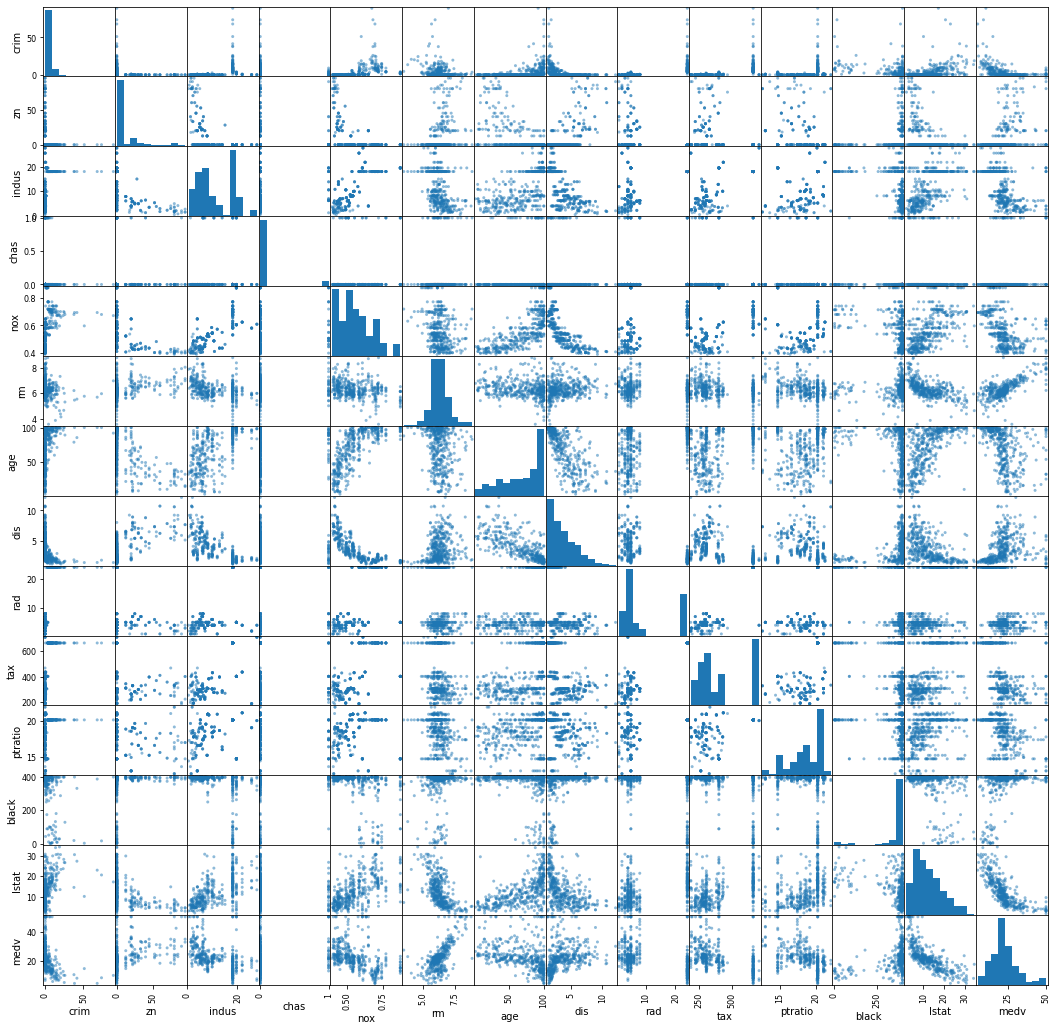

In [21]:
# scatter plot matrix
scatter_matrix(house, figsize=(18, 18))
plt.show()

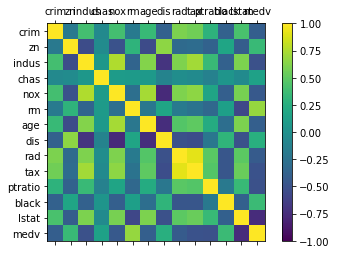

In [26]:
# correlation matrix
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
cax = ax.matshow(house.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(house.columns)
ax.set_yticklabels(house.columns)
plt.show()

### Taking only values

In [27]:
house_array = house.values

### Feature and Label dataset

In [28]:
X = house_array[:, 0:13]
y = house_array[:, 13]

### Dividing dataset into train test

In [29]:
validation_size = 0.20
seed = 7
Xtrain, xvalidation, Ytrain, yvalidation = train_test_split(X,y, test_size=validation_size, random_state=seed)


### Evaluate Algorithms: Baseline

In [32]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'


In [33]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    

LR: -22.192041 (7.782165)
LASSO: -26.034728 (9.021854)
EN: -25.480074 (8.775812)
KNN: -35.500868 (11.996449)
CART: -21.245418 (9.258978)
SVR: -78.014217 (22.587156)


/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/

### Compare Algorithm

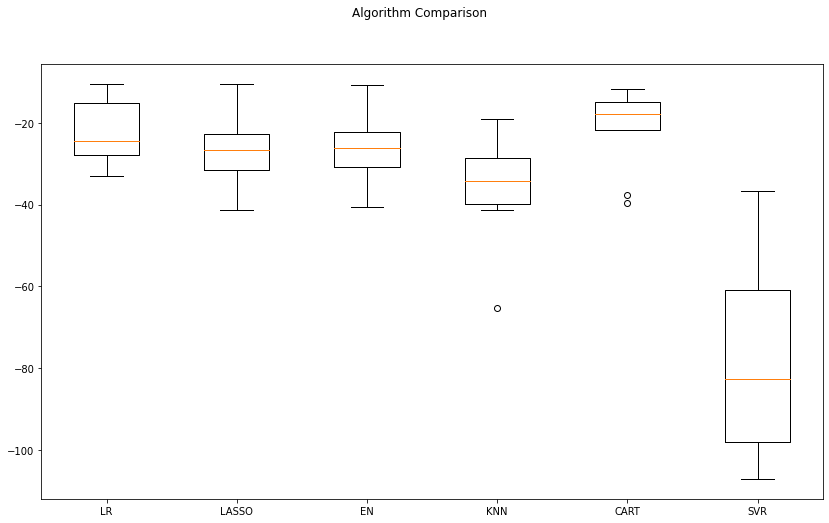

In [38]:
# Compare Algorithms
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Evaluate Algorithms: Standardization

In [39]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))

pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

ScaledLR: -22.192041 (7.782165)
ScaledLASSO: -27.179293 (9.355061)
ScaledEN: -28.113263 (10.169846)
ScaledKNN: -23.068299 (10.504009)
ScaledCART: -23.661515 (10.442804)
ScaledSVR: -30.906513 (12.282749)


### distribution of the scores

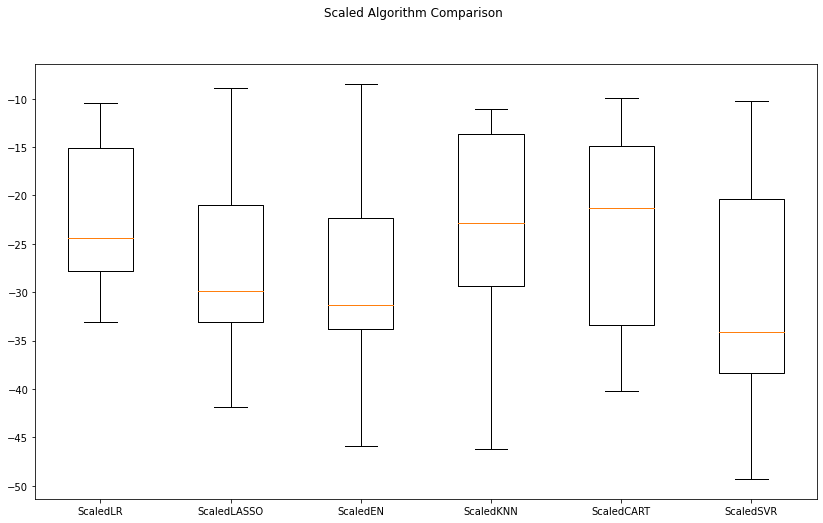

In [41]:
# Compare Algorithms
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Improve Results With Tuning

In [42]:
scaler = StandardScaler().fit(Xtrain)
rescaledX = scaler.transform(Xtrain)

In [45]:
# KNN Algorithm tuning
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Ytrain)

/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -21.857635 using {'n_neighbors': 13}
-25.374396 (15.808384) with: {'n_neighbors': 1}
-21.893681 (9.530895) with: {'n_neighbors': 3}
-22.852597 (10.737965) with: {'n_neighbors': 5}
-22.879765 (10.699897) with: {'n_neighbors': 7}
-22.499166 (10.556657) with: {'n_neighbors': 9}
-22.099742 (10.850551) with: {'n_neighbors': 11}
-21.857635 (10.201276) with: {'n_neighbors': 13}
-23.250878 (11.104023) with: {'n_neighbors': 15}
-23.811925 (11.003933) with: {'n_neighbors': 17}
-24.307504 (11.278117) with: {'n_neighbors': 19}
-24.880852 (11.163930) with: {'n_neighbors': 21}


### Ensemble Methods

In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:

1. Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
2. Bagging Methods: Random Forests (RF) and Extra Trees (ET).
    
    

In [52]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor(n_estimators=100))])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(n_estimators=100))])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=100))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=100))])))


In [53]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

ScaledAB: -17.425428 (8.805641)
ScaledGBM: -12.227087 (7.154788)
ScaledRF: -13.596651 (7.263775)
ScaledET: -13.109892 (8.246582)


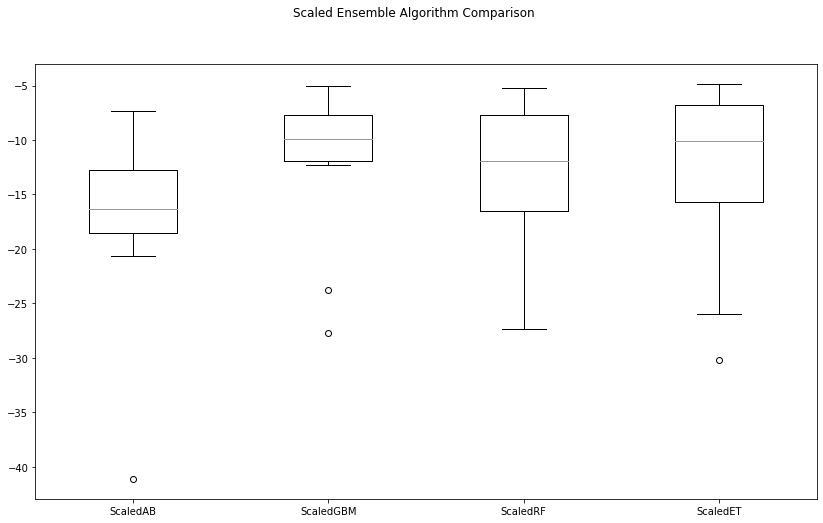

In [55]:
# Compare Algorithms
fig = plt.figure(figsize=(14,8))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Tune Ensemble Methods

In [56]:
scaler = StandardScaler().fit(Xtrain)
rescaledX = scaler.transform(Xtrain)

In [57]:
# Tune scaled GBM
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Ytrain)

/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [58]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -12.004129 using {'n_estimators': 200}
-13.191139 (7.326757) with: {'n_estimators': 50}
-12.233504 (7.339435) with: {'n_estimators': 100}
-12.125973 (7.584583) with: {'n_estimators': 150}
-12.004129 (7.716108) with: {'n_estimators': 200}
-12.025697 (7.812993) with: {'n_estimators': 250}
-12.078171 (7.906266) with: {'n_estimators': 300}
-12.131006 (7.925899) with: {'n_estimators': 350}
-12.147211 (7.962218) with: {'n_estimators': 400}


### Finalize Model

In [59]:
# prepare the model
scaler = StandardScaler().fit(Xtrain)
rescaledX = scaler.transform(Xtrain)


In [60]:
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [62]:
# transform the validation dataset
rescaledValidationX = scaler.transform(xvalidation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(yvalidation, predictions))

8.02881062899757


# Same Project Using Deep Learning

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV 
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense


### Reading Dataset

In [124]:
house = pd.read_csv('/home/hasan/DATA SET/boston_data.csv')

### Summarize the dataset

In [125]:
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.16,0.0,10.81,0.0,0.41,5.96,17.5,5.29,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10,25.0,5.13,0.0,0.45,5.93,47.2,6.93,8.0,284.0,19.7,396.90,9.22,19.6
2,0.35,0.0,9.90,0.0,0.54,5.97,76.7,3.10,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73,0.0,19.58,0.0,0.87,5.60,94.9,1.53,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04,21.0,5.64,0.0,0.44,6.12,63.0,6.81,4.0,243.0,16.8,393.97,9.43,20.5


In [126]:
house.shape

(404, 14)

In [127]:
house.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [128]:
house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,4.04e+02,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.73e+00,10.51,11.19,0.07,0.56,6.30,68.60,3.80,9.84,411.69,18.44,355.07,12.60,22.31
std,8.94e+00,22.05,6.81,0.25,0.12,0.68,28.07,2.11,8.83,171.07,2.15,94.49,6.93,8.84
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.17,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.24e-02,0.00,5.19,0.00,0.45,5.90,45.80,2.09,4.00,281.00,17.38,374.71,7.13,17.10
50%,2.54e-01,0.00,9.79,0.00,0.54,6.23,76.60,3.21,5.00,330.00,19.00,391.06,11.27,21.40
75%,4.05e+00,12.50,18.10,0.00,0.63,6.63,94.15,5.22,24.00,666.00,20.20,396.01,16.91,25.00
max,8.90e+01,95.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,34.37,50.00


In [129]:
# correlation
pd.set_option('precision', 2)
print(house.corr(method='pearson'))


         crim    zn  indus  chas   nox    rm   age   dis   rad   tax  ptratio  \
crim     1.00 -0.19   0.40 -0.06  0.41 -0.17  0.35 -0.38  0.60  0.57     0.29   
zn      -0.19  1.00  -0.53 -0.04 -0.50  0.30 -0.55  0.66 -0.31 -0.29    -0.37   
indus    0.40 -0.53   1.00  0.06  0.76 -0.35  0.63 -0.70  0.62  0.72     0.36   
chas    -0.06 -0.04   0.06  1.00  0.10  0.09  0.08 -0.10 -0.02 -0.04    -0.12   
nox      0.41 -0.50   0.76  0.10  1.00 -0.27  0.73 -0.76  0.61  0.66     0.17   
rm      -0.17  0.30  -0.35  0.09 -0.27  1.00 -0.21  0.18 -0.17 -0.24    -0.32   
age      0.35 -0.55   0.63  0.08  0.73 -0.21  1.00 -0.73  0.47  0.50     0.23   
dis     -0.38  0.66  -0.70 -0.10 -0.76  0.18 -0.73  1.00 -0.50 -0.53    -0.21   
rad      0.60 -0.31   0.62 -0.02  0.61 -0.17  0.47 -0.50  1.00  0.92     0.49   
tax      0.57 -0.29   0.72 -0.04  0.66 -0.24  0.50 -0.53  0.92  1.00     0.47   
ptratio  0.29 -0.37   0.36 -0.12  0.17 -0.32  0.23 -0.21  0.49  0.47     1.00   
black   -0.38  0.18  -0.38  

### Data Visualizations

##### Univariate plots

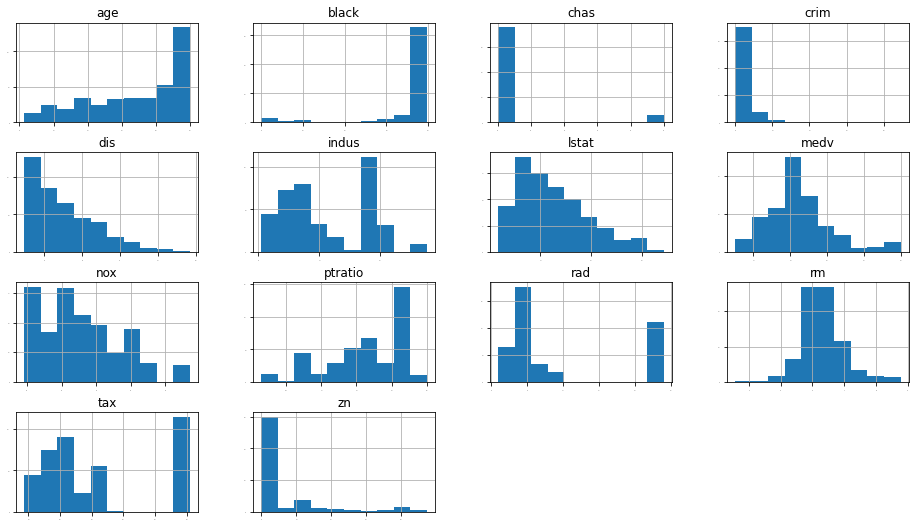

In [130]:
# histograms
house.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(16,9))
plt.show()

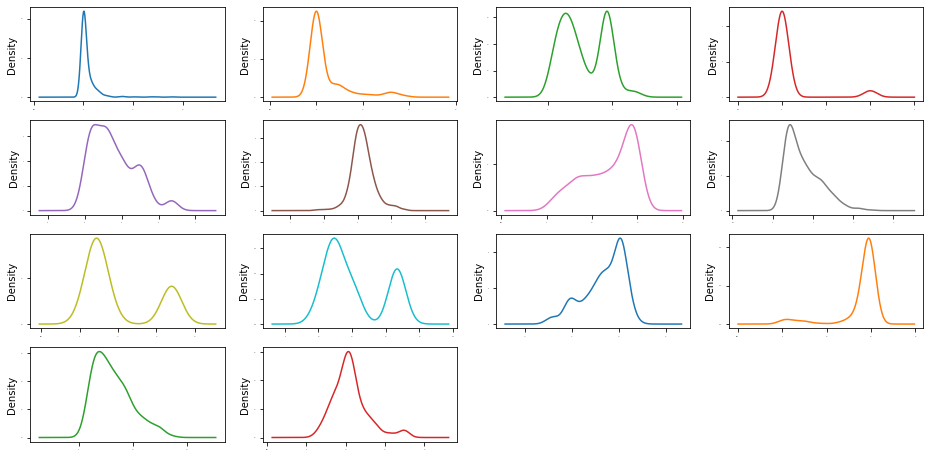

In [131]:
# density
house.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=(16,8))
plt.show()


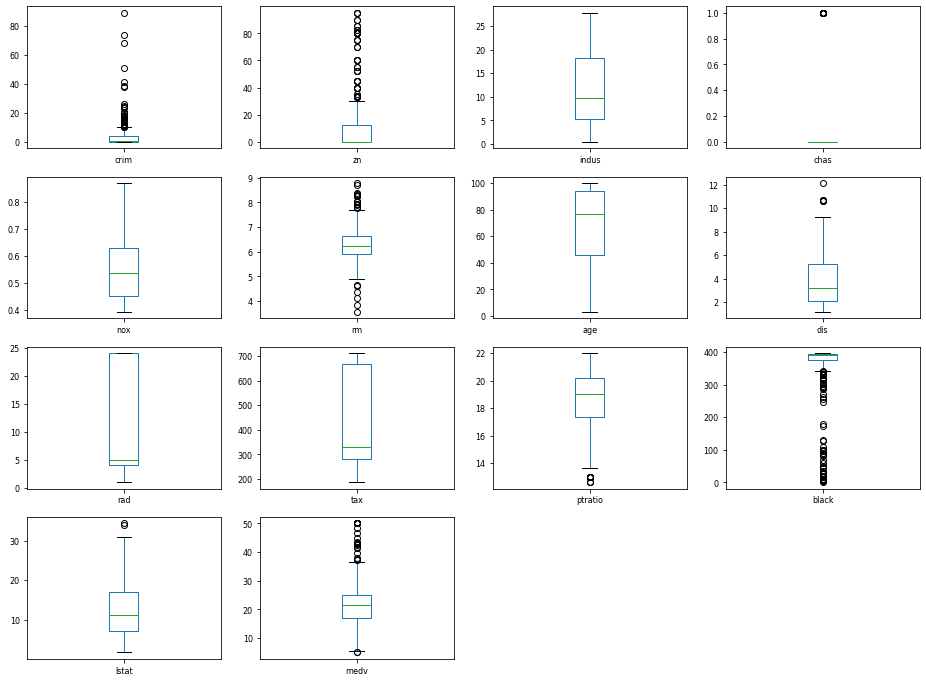

In [132]:
# box and whisker plots
house.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, figsize=(16,12))
plt.show()


##### Multivariate plot

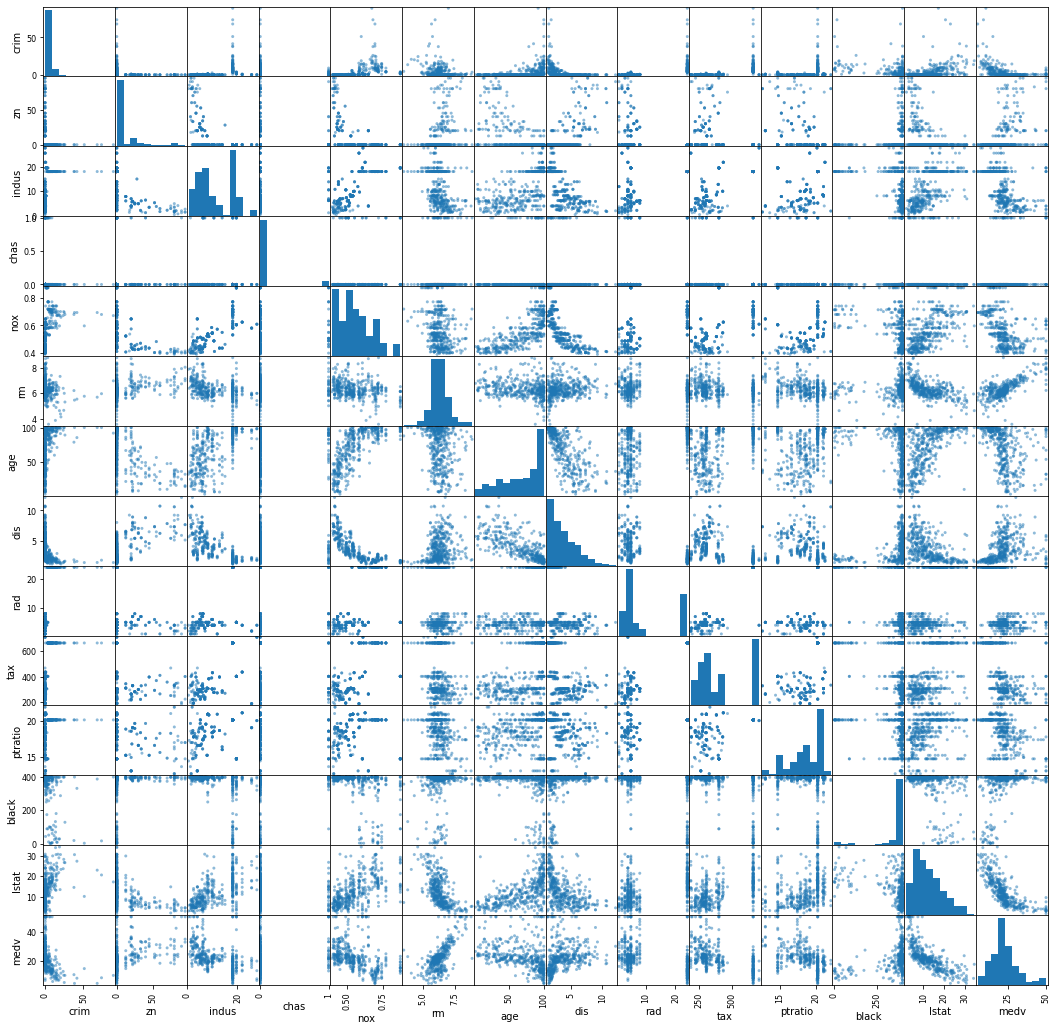

In [133]:
# scatter plot matrix
scatter_matrix(house, figsize=(18, 18))
plt.show()

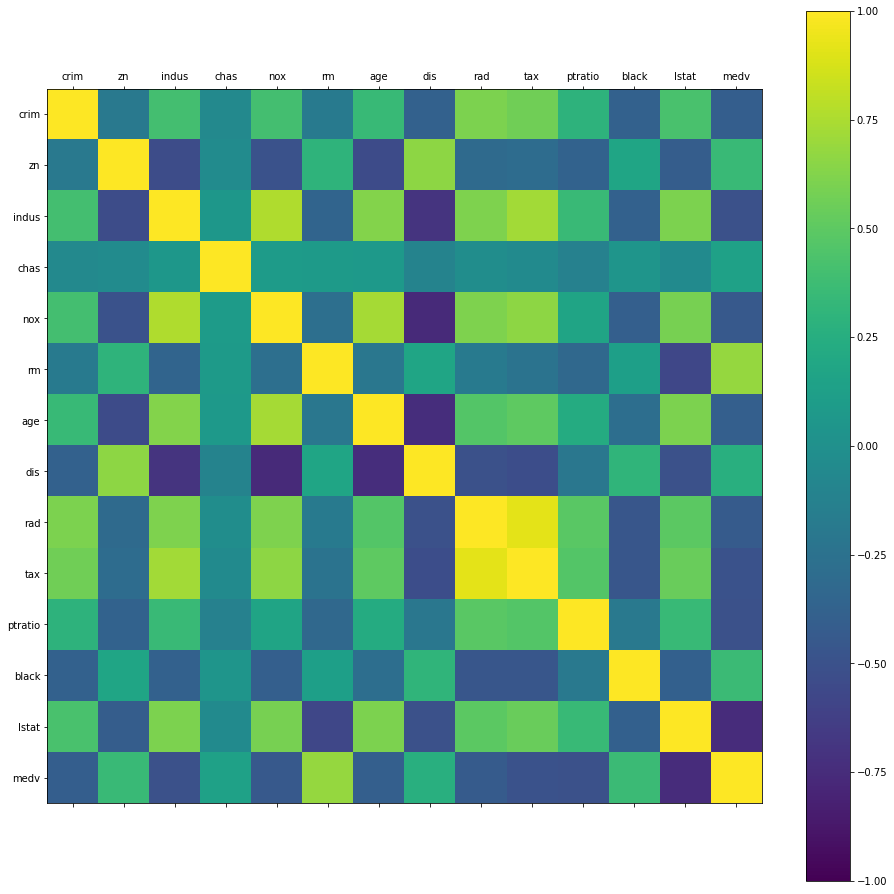

In [134]:
# correlation matrix
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
cax = ax.matshow(house.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(house.columns)
ax.set_yticklabels(house.columns)
plt.show()

### Taking only values

In [135]:
house_array = house.values

### Feature and Label dataset

In [136]:
X = house_array[:, 0:13]
y = house_array[:, 13]

### Neural Network

In [137]:
def baseline_model():
    model = Sequential()
    model.add(Dense(50, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer= 'normal', activation='relu'))
    model.add(Dense(1, kernel_initializer= 'normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer='adam')
    return model

### Data Standardize

In [138]:
estimators = []
estimators.append(('standardize', StandardScaler()))

### Keras Regressor

In [139]:
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

### K-Fold

In [140]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -12.89 (6.70) MSE
